In [13]:
import pandas as pd

In [14]:
post_edit_file = "/storage/brno2/home/rahmang/xcomet/arafat_comet/COMET_GR/postedition_aligned.community.tsv"

In [15]:
# Read TSV file into DataFrame
df = pd.read_csv(post_edit_file, sep='\t')

# Display the first 5 rows
print(df.head(10))


    id_hal  Translation_id  Postedit_id  line_id  \
0  1988871            7033          402        0   
1  1988871            7033          402        1   
2  1988871            7033          402        2   
3  1988871            7033          402        3   
4  1988871            7033          402        4   
5  1988871            7033          402        5   
6  1821049            6181          159        0   
7  1821049            6181          159        1   
8  1821049            6181          159        2   
9  1821049            6181          159        3   

                                              source  \
0  Transforming Dependency Structures to LTAG Der...   
1  We propose a new algorithm for parsing Lexical...   
2  That is, given a sentence and its correspondin...   
3  Moreover, we prove that this algorithm has a l...   
4  This algorithm returns all compatible derivati...   
5  This result is of practical interest to the de...   
6  Corpus Based Machine Translation

In [4]:
df.keys()

Index(['id_hal', 'Translation_id', 'Postedit_id', 'line_id', 'source',
       'translation', 'postedition'],
      dtype='object')

In [5]:
df.shape

(659, 7)

In [6]:
# Group by Postedit_id and line_id, collect translations into lists
grouped = df.groupby(['Postedit_id', 'line_id'])['translation'].apply(list).reset_index()


In [7]:
grouped.head()

,Postedit_id,line_id,translation
0,60,0,[Évaluation de la compétence morphologique des...
1,60,1,[Bien que les récents changements apportés à l...
2,60,2,[Cet article propose un nouveau type d'évaluat...
3,60,3,[Notre approche utilise des paires de phrases ...
4,60,4,[Cette méthodologie est utilisée pour comparer...


In [8]:
import pandas as pd

# Group by Postedit_id and aggregate translations/postedits into flat lists
grouped_df = df.groupby("Postedit_id").agg(
    source=("source", list), # list of source sentences against the same Postedit_id
    translation=("translation", list),  # Collect all translations
    postedition=("postedition", list)           # Collect all posteds (replace "postedit" with your actual column name)
).reset_index()

In [9]:
grouped_df.head()


,Postedit_id,source,translation,postedition
0,60,[Evaluating the morphological competence of Ma...,[Évaluation de la compétence morphologique des...,[Évaluation de la compétence morphologique des...
1,61,"[One Source, Two Targets: Challenges and Rewar...","[Une source, deux cibles: Défis et récompenses...","[Une source, deux cibles: Défis et bénéfices d..."
2,62,"[Neural Baselines for Word Alignments, Word al...",[Lignes de base neuronales pour les alignement...,[Modèles neuronaux de base pour l'alignement d...
3,80,[Multilingual Lexicalized Constituency Parsing...,[Lexicalized Constituency Parsing multilingue ...,[Tâches auxiliaires au niveau des mots pour l'...
4,82,[Novel elicitation and annotation schemes for ...,[Nouveaux schémas d'élicitation et d'annotatio...,[Nouveaux schémas d'élicitation et d'annotatio...


In [10]:
grouped_df.shape

(95, 4)

In [11]:
num_unique_ids = df['Postedit_id'].nunique()
print(f"Number of unique Postedit IDs in the original df: {num_unique_ids}")

Number of unique Postedit IDs in the original df: 95


In [12]:
num_unique_ids_grouped_df = grouped_df['Postedit_id'].nunique()
print(f"Number of unique Postedit IDs in the grouped_df: {num_unique_ids_grouped_df}")

Number of unique Postedit IDs in the grouped_df: 95


In [13]:
grouped_df['source'][2]

['Neural Baselines for Word Alignments',
 'Word alignments identify translational correspondences between words in a parallel sentence pair and is used, for instance, to learn bilingual dictionaries, to train statistical machine translation systems, or to perform quality estimation.',
 'In most areas of natural language processing, neural network models nowadays constitute the preferred approach, a situation that might also apply to word alignment models.',
 'In this work, we study and comprehensively evaluate neural models for unsupervised word alignment for four language pairs, contrasting several variants of neural models.',
 'We show that in most settings, neural versions of the IBM-1 and hidden Markov models vastly outperform their discrete counterparts.',
 'We also analyze typical alignment errors of the baselines that our models overcome to illustrate the benefits --- and the limitations --- of these new models for morphologically rich languages.']

In [14]:
grouped_df['translation'][2]

['Lignes de base neuronales pour les alignements de mots',
 "Les alignements de mots identifient les correspondances traductionnelles entre les mots d'une paire de phrases parallèles et sont utilisés, par exemple, pour apprendre des dictionnaires bilingues, pour entraîner des systèmes de traduction automatique statistique ou pour effectuer une estimation de la qualité.",
 "Dans la plupart des domaines du traitement du langage naturel, les modèles de réseaux neuronaux constituent aujourd'hui l'approche privilégiée, une situation qui pourrait également s'appliquer aux modèles d'alignement de mots.",
 "Dans ce travail, nous étudions et évaluons de manière exhaustive les modèles neuronaux pour l'alignement de mots non supervisé pour quatre paires de langues, en comparant plusieurs variantes de modèles neuronaux.",
 'Nous montrons que dans la plupart des cas, les versions neuronales des modèles IBM-1 et des modèles de Markov cachés sont nettement plus performantes que leurs équivalents disc

In [15]:
len(grouped_df['translation'][2])

6

In [16]:
grouped_df['postedition'][2]

["Modèles neuronaux de base pour l'alignement de mots",
 "Les alignements de mots identifient les correspondances traductionnelles entre mots au sein d'une paire de phrases parallèles et sont utilisés, par exemple, pour apprendre des dictionnaires bilingues, pour entraîner des systèmes de traduction automatique statistique ou pour estimer la qualité d'une traduction.",
 "Dans la plupart des domaines du traitement des langues, les modèles neuronaux constituent aujourd'hui l'approche privilégiée, une situation qui pourrait également s'appliquer aux modèles d'alignement de mots.",
 "Dans ce travail, nous étudions et évaluons de manière exhaustive les modèles neuronaux d'alignement de mots non supervisés pour quatre paires de langues, en comparant plusieurs variantes de ces modèles.",
 'Nous montrons que dans la plupart des cas, les versions neuronales des modèles IBM-1 et des modèles de Markov cachés sont nettement plus performantes que leurs équivalentes discrètes.',
 "Nous analysons éga

In [17]:
# from comet import download_model, load_from_checkpoint
    
# # Load checkpoint into your custom class
# path = "/storage/brno2/home/rahmang/xcomet/downloadedxcomet/models--Unbabel--XCOMET-XL/snapshots/50d428488e021205a775d5fab7aacd9502b58e64/checkpoints/model.ckpt"

# model = load_from_checkpoint(path)


In [18]:
# from comet import download_model, load_from_checkpoint
# model_path = download_model("Unbabel/XCOMET-XL")
# model = load_from_checkpoint(model_path)


In [19]:
# data[:2]

In [20]:
from comet import download_model, load_from_checkpoint

model_path = download_model("Unbabel/XCOMET-XL")
#model = load_from_checkpoint(model_path)

/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00, 415.50it/s]


In [21]:
from comet import download_model, load_from_checkpoint
from comet.models.multitask.unified_metric import UnifiedMetric
class CustomXCOMET(UnifiedMetric):
    print("custom unified_metric")
    
# Load checkpoint into your custom class
#path = "/storage/brno2/home/rahmang/xcomet/downloadedxcomet/models--Unbabel--XCOMET-XL/snapshots/50d428488e021205a775d5fab7aacd9502b58e64/checkpoints/model.ckpt"

model = CustomXCOMET.load_from_checkpoint(model_path,strict = False)

custom unified_metric


Encoder model frozen.
/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


In [22]:
data = [
    {
        "src": "To do so, we propose to map the ontol-ogy elements to multilingual knowledge defined in a SKOS ontology.", 
        "mt": "Pour ce faire, nous proposons de mettre en correspondance les éléments d'ontologie avec des connaissances multilingues définies dans une ontologie SKOS.", 
        "ref": "Pour ce faire, nous proposons de mettre en correspondance les éléments de l'ontologie avec des connaissances multilingues définies dans une ontologie SKOS."
    }
]
data = [
    {
        "src": "10 到 15 分钟可以送到吗",
        "mt": "Can I receive my food in 10 to 15 minutes?",
        "ref": "Can it be delivered between 10 to 15 minutes?"
    },
    {
        "src": "Pode ser entregue dentro de 10 a 15 minutos?",
        "mt": "Can you send it for 10 to 15 minutes?",
        "ref": "Can it be delivered between 10 to 15 minutes?"
    }
]
# data = [
#     {
#         "src": "Boris Johnson teeters on edge of favour with Tory MPs",
#         "mt": "Boris Johnsons Beliebtheit bei Tory-Abgeordneten völlig in der Gunst",
#         "ref": "Boris Johnsons Beliebtheit bei Tory-MPs steht auf der Kippe"
#     }
# ]
# data = [
#     {
#         "src": "",
#         "mt" : "",
#         "ref": ""
     
        
#     }
# ]
model_output = model.predict(data, batch_size=8, gpus=1)
# Segment-level scores
print (model_output.scores)

# System-level score
print (model_output.system_score)

# Score explanation (error spans)
print (model_output.metadata.error_spans)

/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A40') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-800d6e

[0.9882571697235107, 0.9568272829055786]
0.9725422263145447
[[{'text': ['my', 'food'], 'confidence': 0.4160952568054199, 'severity': 'minor', 'start': 13, 'end': 21, 'check severity': ['minor', 'minor']}], [{'text': ['you', 'send', 'it', 'for'], 'confidence': 0.40004390478134155, 'severity': 'major', 'start': 3, 'end': 19, 'check severity': ['minor', 'major', 'minor', 'minor']}]]


In [23]:
print (model_output.metadata)

Prediction([('src_scores', [0.985619068145752, 0.9450921416282654]), ('ref_scores', [1.0011658668518066, 0.9679433107376099]), ('unified_scores', [0.9779865145683289, 0.9574463963508606]), ('error_spans', [[{'text': ['my', 'food'], 'confidence': 0.4160952568054199, 'severity': 'minor', 'start': 13, 'end': 21, 'check severity': ['minor', 'minor']}], [{'text': ['you', 'send', 'it', 'for'], 'confidence': 0.40004390478134155, 'severity': 'major', 'start': 3, 'end': 19, 'check severity': ['minor', 'major', 'minor', 'minor']}]]), ('word_level_probability', [[{'word': 'Can', 'probabilities': [0.5574572086334229, 0.2857380509376526, 0.13698464632034302, 0.01982009969651699]}, {'word': 'I', 'probabilities': [0.45633018016815186, 0.34836578369140625, 0.17273935675621033, 0.022564642131328583]}, {'word': 'receive', 'probabilities': [0.3833216428756714, 0.3765603303909302, 0.21814215183258057, 0.021975846961140633]}, {'word': 'my', 'probabilities': [0.35069525241851807, 0.399934858083725, 0.225836

In [24]:
df.head()

,id_hal,Translation_id,Postedit_id,line_id,source,translation,postedition
0,1988871,7033,402,0,Transforming Dependency Structures to LTAG Der...,Transformation de structures de dépendances en...,Transformation de structures de dépendances en...
1,1988871,7033,402,1,We propose a new algorithm for parsing Lexical...,Nous proposons un nouvel algorithme pour analy...,Nous proposons un nouvel algorithme pour analy...
2,1988871,7033,402,2,"That is, given a sentence and its correspondin...","C'est-à-dire, compte tenu d'une phrase et de s...","C'est-à-dire, étant donné une phrase et de sa ..."
3,1988871,7033,402,3,"Moreover, we prove that this algorithm has a l...","Par ailleurs, on prouve que cet algorithme pré...","Par ailleurs, on prouve que cet algorithme a u..."
4,1988871,7033,402,4,This algorithm returns all compatible derivati...,Cet algorithme retourne tous les arbres de dér...,Cet algorithme retourne tous les arbres de dér...


### create data list for calculating the spans without the ref

data = [List[dict]]

In [25]:
# # Iterate and extract values from two columns
data = []
count = 0
for index, row in df.iterrows():
    Postedit_id = row['Postedit_id']
    source      = row['source']
    translation = row['translation']
    #postedition  = row['postedition']
    #print("index number of the dataset: ", index)
    #print(f"Postedit ID: {Postedit_id}, Translation: {translation}")
    
    data.append({
        "src": source,
        "mt" : translation,
        #"ref": postedition,
    })
   

In [26]:
data[1]

{'src': 'We propose a new algorithm for parsing Lexicalized Tree Adjoining Grammars (LTAGs) which uses pre-assigned bilexi-cal dependency relations as a filter.',
 'mt': "Nous proposons un nouvel algorithme pour analyser les grammaires adjacentes à l'arbre lexicalisé (LTAG) qui utilise des relations de dépendance bilexi-cal pré-assignées comme filtre."}

#### call the model on the data to get the spans

In [27]:
model_output = model.predict(data, batch_size=8, gpus=1)

/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-800d6e9d-f3b0-7bf1-ddc3-8f14e808a26a]
/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that e

In [28]:
# Segment-level scores
print (len(model_output.scores))

# # System-level score
# print (model_output.system_score)

# # Score explanation (error spans)
# print (model_output.metadata.error_spans)

659


In [28]:
# Score explanation (error spans)
print (model_output.metadata.error_spans[1])

[{'text': ['algorithme'], 'confidence': 0.4003690779209137, 'severity': 'minor', 'start': 24, 'end': 35, 'check severity': ['minor']}, {'text': ['grammaires', 'adjacentes', 'à', "l'arbre", 'lexicalisé', '(LTAG)'], 'confidence': 0.3999324440956116, 'severity': 'minor', 'start': 53, 'end': 103, 'check severity': ['minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor']}, {'text': ['bilexi-cal'], 'confidence': 0.40936070680618286, 'severity': 'minor', 'start': 143, 'end': 154, 'check severity': ['minor', 'minor', 'minor']}]


In [29]:
for output in model_output.metadata.error_spans:
    print(output)

[{'text': ['Transformation', 'de', 'structures', 'de', 'dépendances', 'en', 'arbres', 'de', 'dérivation', 'LTAG'], 'confidence': 0.4364859461784363, 'severity': 'minor', 'start': 0, 'end': 72, 'check severity': ['minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor']}]
[{'text': ['algorithme'], 'confidence': 0.4003690779209137, 'severity': 'minor', 'start': 24, 'end': 35, 'check severity': ['minor']}, {'text': ['grammaires', 'adjacentes', 'à', "l'arbre", 'lexicalisé', '(LTAG)'], 'confidence': 0.3999324440956116, 'severity': 'minor', 'start': 53, 'end': 103, 'check severity': ['minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor']}, {'text': ['bilexi-cal'], 'confidence': 0.40936070680618286, 'severity': 'minor', 'start': 143, 'end': 154, 'check severity': ['minor', 'minor', 'minor']}]
[{'text': ['de', 'dépendance', 'bien', 'formée'], 'conf

In [30]:
# create a json file with the results
import json

# Save to a JSON file
with open("output_all_spans.json", "w", encoding="utf-8") as f:
    json.dump(model_output.metadata.error_spans, f, ensure_ascii=False, indent=2)  # `indent` for readability

In [1]:
# Read the JSON file
import json

with open("output_all_spans.json", "r", encoding="utf-8") as f:
    loaded_data_all_spans = json.load(f)

In [2]:
loaded_data_all_spans[1]

[{'text': ['algorithme'],
  'confidence': 0.4003690779209137,
  'severity': 'minor',
  'start': 24,
  'end': 35,
  'check severity': ['minor']},
 {'text': ['grammaires', 'adjacentes', 'à', "l'arbre", 'lexicalisé', '(LTAG)'],
  'confidence': 0.3999324440956116,
  'severity': 'minor',
  'start': 53,
  'end': 103,
  'check severity': ['minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor',
   'minor']},
 {'text': ['bilexi-cal'],
  'confidence': 0.40936070680618286,
  'severity': 'minor',
  'start': 143,
  'end': 154,
  'check severity': ['minor', 'minor', 'minor']}]

In [3]:
from collections import Counter


# Flatten and count all 'check severity' values
severity_counter = {'minor': 0, 'major': 0, 'critical': 0}
for sentence in loaded_data_all_spans:
    for i, spans in enumerate(sentence):
        if spans["severity"] == "minor":
            severity_counter["minor"] += len(spans["text"])
        elif spans["severity"] == "major":
            severity_counter["major"] += len(spans["text"])
        elif spans["severity"] == "critical":
            severity_counter["critical"] += len(spans["text"])

In [4]:
severity_counter

{'minor': 1401, 'major': 1547, 'critical': 27}

In [5]:
total_operations_by_pe = 0 # this is the number of insertions/deletions/replace
total_number_of_insertions_global = 0
insertions_inside_spans_global = 0
insertions_outside_spans_global = 0 
insertions_inside_spans_global_severity = {
    
                                            "minor":0,
                                            "major":0,
                                            "critical":0
                                          } 
insertions_inside_spans_words_index_global = []# store sentence number,index as the tuple
severity_tp = {} # store all the words from minor, major and critical ( these will be the keys and the
# words will be the values
severity_fp = {"minor":0,
                "major":0,
                "critical":0} # store all the words from minor, major and critical ( these will be the keys and the
# words will be the values
ok_count_global = 0
replace_count_global = 0
delete_count_global = 0
minors = 0
majors = 0
criticals = 0
tp = 0
fp = 0
fn = 0

### difflib helper function


In [6]:
#mapping between tokenized words and raw indices
def split_with_indice(text):
    words = []
    current_position = 0
    n = len(text)
    while current_position < n:
        # Skip leading spaces
        while current_position < n and text[current_position] == ' ':
            current_position += 1
        if current_position >= n:
            break
        start = current_position
        # Find end of word
        while current_position < n and text[current_position] != ' ':
            current_position += 1
        end = current_position  # Last character index of the word
        words.append((text[start:end+1], start, end))
    return words

In [7]:
words_with = split_with_indice("Transformation de structures de dépendances en arbres de dérivation LTAG")

In [8]:
words_with

[('Transformation ', 0, 14),
 ('de ', 15, 17),
 ('structures ', 18, 28),
 ('de ', 29, 31),
 ('dépendances ', 32, 43),
 ('en ', 44, 46),
 ('arbres ', 47, 53),
 ('de ', 54, 56),
 ('dérivation ', 57, 67),
 ('LTAG', 68, 72)]

In [9]:
# get the relevant words and mapping to show if inside a span, the changes doney by the post editors
# yielded any less or more words in the post edited sentence- utility function
def mapping_get_the_relevant_words(words1, words2,i1, i2, j1, j2):
    replaced_words1 = words1[i1:i2]
    replaced_words2 = words2[j1:j2]
    changes = []
    # Pair words (even if replacement lengths differ)
    max_len = max(len(replaced_words1), len(replaced_words2))
    for idx in range(max_len):
        word1 = replaced_words1[idx] if idx < len(replaced_words1) else None
        word2 = replaced_words2[idx] if idx < len(replaced_words2) else None
        changes.append((word1, word2))
    return changes

In [10]:
from difflib import SequenceMatcher

def find_word_replacements(index, text1, text2, error_spans_indexes):
    # Tokenize into words
    words1 = text1.split()
    words2 = text2.split()
    #print("text1: ", text1)
    words_with_indice = split_with_indice(text1)
    #print("type of text1: ", type(text), " and the text1 is: ", text)
    #print("words_with_indices: ", words_with_indice)
    # print("words1: ", words1)
    # print("words2: ", words2)
    #print("error_spans_indexes: ", error_spans_indexes)
    matcher = SequenceMatcher(None, words1, words2)
    opcodes = matcher.get_opcodes()
    ok_count = 0 
    replace_count = 0 
    delete_count = 0 
    insertions_inside_spans = 0 
    insertions_outside_spans = 0 
    total_number_of_insertions = 0 
    insertions_inside_spans_severity = {}
    insertions_inside_spans_words_index = []
    mapping = [] 
    relevant_words = []
    insertions = []
    not_relevant_words = []
    for tag, i1, i2, j1, j2 in opcodes:
            if tag == "replace":
            # Extract replaced(any replace/insertion/deletions) words
                replacements = mapping_get_the_relevant_words(words1, words2,i1, i2, j1, j2)
                relevant_words.extend([t[0] for t in replacements])
            elif tag == "delete":
                replacements = mapping_get_the_relevant_words(words1, words2,i1, i2, j1, j2)
                relevant_words.extend([t[0] for t in replacements])
            elif tag == "insertion":
                replacements = mapping_get_the_relevant_words(words1, words2,i1, i2, j1, j2)
                insertions.append(("insertion",index, i1, i2, [t[1] for t in replacements]))
            else:
                replacements = mapping_get_the_relevant_words(words1, words2,i1, i2, j1, j2)
                not_relevant_words.extend([t[0] for t in replacements])
            mapping.append((tag, replacements))

            if tag == "equal":
                ok_count += i2 - i1 # not relevant words as they were not edited by the post editors
            # elif tag == "insert":
            #     #print("text1: ", text1)
            #     # print("tag: ", tag)
            #     # print("opcodes: ", opcodes)
            #     # print("words_with_indices: ", words_with_indice)
            #     # print("len of words_with_indices: ", len(words_with_indice))
            #     if i1 >= len(words_with_indice) or (i1 == 0 and i2==0): 
            #         # (insert,0,0, 0,2)
            #         insertions_outside_spans += j2 - j1
            #         total_number_of_insertions += j2 - j1
            #         continue
            #     span_offset = (words_with_indice[i1][1], words_with_indice[i2][2])
            #     #i1 is the index number in the words_with_indice list to get the first
            #     # w, and [1] this will retrive
            #     in_span_insertion = False
            #     for spans_index in error_spans_indexes:
            #         if span_offset[0]<= spans_index[0] and span_offset[1]<= spans_index[1]:
            #             in_span_insertion = True
            #             break
            #     if in_span_insertion:
            #         insertions_inside_spans += 1 if i2 - i1 == 0 else i2 - i1
            #     else:
            #         insertions_outside_spans += 1 if i2 - i1 == 0 else i2 - i1
            #     total_number_of_insertions += 1 if i2 - i1 == 0 else i2 - i1
            elif tag == "insert":
                if i1 == 0:
                    # take the oth index and check if that belongs to a span
                    insertion_span = (words_with_indice[i1][1], words_with_indice[i1][2])
                else:
                    # take the previous word's index from the insertion index to check the start
                    # of the span and for checking if the ending offset inside the end of the span, 
                    #take the last offset position of the insertion index
                    # print("words_with_indice ", words_with_indice)
                    # print("opcodes: ", opcodes)
                    # print("i1: ", i1)
                    # print("words_with_indice[i1][2]: ", words_with_indice[i1])
                    insertion_span = (words_with_indice[i1-1][1], words_with_indice[i1-1][2])

                in_span_insertion = False
                for spans_index in error_spans_indexes:
                    severity = spans_index[0]
                    #print("severity:::::::::::::::::::::: ", severity)
                    if i1 == 0:
                        #print("spans_index[0] :", spans_index[1] , "and insertion_span[0]: ",insertion_span[0] )
                        if  spans_index[1] <= insertion_span[0] and insertion_span [1]<= spans_index[2]:
                            in_span_insertion = True
                            if severity in insertions_inside_spans_severity:
                                insertions_inside_spans_severity[severity] += 1  
                            else:
                                insertions_inside_spans_severity[severity] = 1
                            insertions_inside_spans_words_index.append((index,i1,i2))
                            break
                    
                    else:
                         #print("spans_index[0] :", spans_index[0] , "and insertion_span[0]: ",insertion_span[0] )
                         if  spans_index[1] < insertion_span[0] and insertion_span [1]<= spans_index[2]:
                            in_span_insertion = True
                            if severity in insertions_inside_spans_severity:
                                insertions_inside_spans_severity[severity] += 1  
                            else:
                                insertions_inside_spans_severity[severity] = 1
                            insertions_inside_spans_words_index.append((index,i1,i2))
                            break
                if in_span_insertion:
                    insertions_inside_spans += 1 if i2 - i1 == 0 else i2 - i1
                else:
                    insertions_outside_spans += 1 if i2 - i1 == 0 else i2 - i1
                total_number_of_insertions += 1 if i2 - i1 == 0 else i2 - i1
            elif tag == "replace":
                
                replace_count += max(i2-i1, j2-j1)
            elif tag == "delete":
                delete_count += i2- i1
                                
    
    return mapping, ok_count, replace_count, delete_count,insertions_inside_spans,insertions_outside_spans,total_number_of_insertions,relevant_words,not_relevant_words, insertions_inside_spans_severity, insertions_inside_spans_words_index


In [11]:
relevant_words_global = []
not_relevant_words_global = []
statistics_results_json = []
import copy

In [16]:
# iterate through the aligned postedition df
for index, row in df.iterrows():
    # get the severity counts and create the words_in_the_spans list containing all the words in
    #the spans
    words_in_the_spans = {}
    #print(index)
    spans_each_mt = copy.deepcopy(loaded_data_all_spans[index])  # Create an independent copy
    
    if index == 1:
        print("spans_each_mt: ", spans_each_mt)
    error_spans_indexes = []
    for i, span in enumerate(spans_each_mt):
        if span['severity'] == "minor":
            minors += len(span['text'])
            if "minor" in words_in_the_spans:
                words_in_the_spans["minor"].extend(span["text"].copy())
            else:
                words_in_the_spans["minor"] = span["text"].copy()
        elif span['severity'] == "major":
            majors += len(span['text'])
            if "major" in words_in_the_spans:
                words_in_the_spans["major"].extend(span["text"].copy())
            else:
                words_in_the_spans["major"] = span["text"].copy()
        elif span['severity'] == "critical":
            criticals += len(span['text'])
            if "critical" in words_in_the_spans:
                words_in_the_spans["critical"].extend(span["text"].copy())
            else:
                words_in_the_spans["critical"] = span["text"].copy()
        
        #words_in_the_spans.extend(span["text"])
        # if index == 1 and i==0:
        #     print(spans_each_mt)
        error_spans_indexes.append((span['severity'],span['start'], span['end']))
    ok = len(words_in_the_spans) - (minors + majors + criticals)
    #print("words_in_the_spans before: ", words_in_the_spans)
    # use difflib
    translation = row['translation']
    postedition  = row['postedition']
    #print("translation: ", translation )
    difflib_result, ok_count, replace_count, delete_count,insertions_inside_spans,insertions_outside_spans,total_number_of_insertions,relevant_words, not_relevant_words,insertions_inside_spans_severity, insertions_inside_spans_words_index = find_word_replacements(index, translation, postedition, error_spans_indexes)

    total_number_of_insertions_global += total_number_of_insertions
    insertions_inside_spans_global += insertions_inside_spans
    insertions_outside_spans_global += insertions_outside_spans
    ok_count_global += ok_count
    replace_count_global += replace_count
    delete_count_global += delete_count
    if index == 1:
        print("relevant_words: ", relevant_words)
    relevant_words_copy = relevant_words.copy()
    #print("insertions_inside_spans_severity, ", insertions_inside_spans_severity)
    #print("insertions_inside_spans_words_index: ", insertions_inside_spans_words_index)
    # Update global severity counts
    for key, value in insertions_inside_spans_severity.items():
        insertions_inside_spans_global_severity[key] += value  # assumes key is one of the three

    # Extend global list with new tuples
    insertions_inside_spans_words_index_global.extend(insertions_inside_spans_words_index)
    
    
    # get relevant, not relevant words and insertions count from difflib result
    #print("words_in_the_spans", words_in_the_spans)
    #print("relevant_words: ", relevant_words)    
    for severity, words in words_in_the_spans.items():
        for word in words:
            if word in relevant_words:
                tp += 1
                if severity in severity_tp:
                    severity_tp[severity] +=1
                else:
                    severity_tp[severity] =1
                words.remove(word)
                relevant_words.remove(word)
    #print("words_in_the_spans: ", words_in_the_spans)
    for severity, words in words_in_the_spans.items():
        
        #print("index: ", index, severity, words)
        if severity == "minor":
            severity_fp[severity] += len(words)           
            fp += len(words)
        elif severity == "major":
            severity_fp[severity] += len(words)
            fp += len(words)
        else:
            severity_fp["critical"] += len(words)
            fp += len(words)
        
    
    fn += len(relevant_words)
    if index == 1:
        print("relevant_words after operations: ", relevant_words)
        print("relevant_words_copy after operations: ", relevant_words_copy)
    #write the json file
    
    entry = {
        "index": index + 1,  # Index starts at 1 instead of 0
        "source": row['source'],
        "translation": row['translation'],
        "postedition": row['postedition'],
        "spans_each_mt": copy.deepcopy(spans_each_mt),
        "relevant_words": relevant_words_copy
    }
    
    # Append the entry to the list
    statistics_results_json.append(entry)

    # if index == 1:
    #     print(difflib_result)
    #     print("words_in_the_spans: ", words_in_the_spans)
        
    

spans_each_mt:  [{'text': ['algorithme'], 'confidence': 0.4003690779209137, 'severity': 'minor', 'start': 24, 'end': 35, 'check severity': ['minor']}, {'text': ['grammaires', 'adjacentes', 'à', "l'arbre", 'lexicalisé', '(LTAG)'], 'confidence': 0.3999324440956116, 'severity': 'minor', 'start': 53, 'end': 103, 'check severity': ['minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor', 'minor']}, {'text': ['bilexi-cal'], 'confidence': 0.40936070680618286, 'severity': 'minor', 'start': 143, 'end': 154, 'check severity': ['minor', 'minor', 'minor']}]
relevant_words:  ['adjacentes', 'à', "l'arbre", 'lexicalisé', 'bilexi-cal']
relevant_words after operations:  ['à', 'lexicalisé']
relevant_words_copy after operations:  ['adjacentes', 'à', "l'arbre", 'lexicalisé', 'bilexi-cal']


In [18]:
statistics_results_json[2]

{'index': 3,
 'source': 'That is, given a sentence and its corresponding well-formed dependency structure, the parser assigns elementary trees to words of the sentence and return attachment sites compatible with these elementary trees and predefined dependencies.',
 'translation': "C'est-à-dire, compte tenu d'une phrase et de sa structure de dépendance bien formée correspondante, le parseur attribue des arbres élémentaires à des mots de la phrase et retourne des sites d'attachement compatibles avec ces arbres élémentaires et des dépendances prédéfinies.",
 'postedition': "C'est-à-dire, étant donné une phrase et de sa structure en dépendances bien formé, l'analyseur attribue des arbres élémentaires à des mots de la phrase et retourne les sites d'attachement compatibles avec ces arbres élémentaires et ces dépendances prédéfinies.",
 'spans_each_mt': [{'text': ['de', 'dépendance', 'bien', 'formée'],
   'confidence': 0.41975802183151245,
   'severity': 'minor',
   'start': 57,
   'end': 83

In [19]:
#statistics_results_json
# Save the entire list to a single JSON file
with open("all_entries_bug_fixed.json", "w", encoding="utf-8") as f:
    json.dump(statistics_results_json, f, ensure_ascii=False, indent=4)  # Format for readability

In [20]:
print(total_number_of_insertions_global)
print(insertions_inside_spans_global)
print(insertions_outside_spans_global)

144
49
95


In [21]:
print(ok_count_global)
print(replace_count_global)
print(delete_count_global)
print("total: ", ok_count_global + replace_count_global + delete_count_global)

13751
2797
210
total:  16758


In [22]:
tn = ok_count_global-fp
tn

11438

In [23]:
print("tp: ",tp)
print("fp: ", fp)
print("fn: ", fn)
# print("tn: ", tn)
print("total: ", tp+ fp + fn + tn)

tp:  662
fp:  2313
fn:  2345
total:  16758


In [24]:
severity_tp

{'minor': 298, 'major': 356, 'critical': 8}

In [25]:
severity_fp

{'minor': 1103, 'major': 1191, 'critical': 19}

In [26]:
insertions_inside_spans_global_severity

{'minor': 20, 'major': 29, 'critical': 0}

In [81]:
! pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


In [78]:
! pip list | grep matplotlib

matplotlib-inline         0.1.7


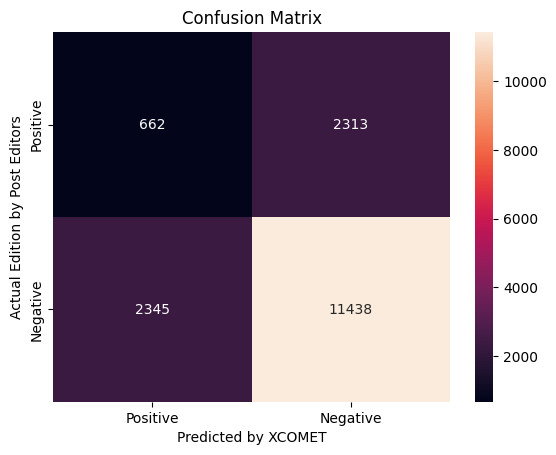

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

conf_matrix = np.array([[tp, fp],
                        [fn, tn]])

labels = ['Positive', 'Negative']

sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted by XCOMET')
plt.ylabel('Actual Edition by Post Editors')
plt.title('Confusion Matrix')
plt.show()


In [28]:
precision = tp / (tp + fp)
print("precision: ", precision)
recall = tp/ (tp + fn)
print("recall: ", recall)

precision:  0.22252100840336134
recall:  0.220152976388427


	translation
1	Transformation de structures de dépendances en arbres de dérivation LTAG

	postedition
1	Transformation de structures de dépendances en arbres de dérivation LTAG

	translation
2	Nous proposons un nouvel algorithme pour analyser les grammaires adjacentes à l'arbre lexicalisé (LTAG) qui utilise des relations de dépendance bilexi-cal pré-assignées comme filtre.

In [38]:
translation = "Transformation de structures de dépendances en arbres de dérivation LTAG."
print(translation[0:72])
trn = translation[0:72]
len(translation)

Transformation de structures de dépendances en arbres de dérivation LTAG


73

In [39]:
words_splitted= trn.split()

In [40]:
words_splitted

['Transformation',
 'de',
 'structures',
 'de',
 'dépendances',
 'en',
 'arbres',
 'de',
 'dérivation',
 'LTAG']

### end

In [ ]:
from collections import defaultdict

In [ ]:
severity_ranking = {
            "minor":1,
            "major":2,
            "critical":3,
        }
severity = ['critical', 'critical', 'minor', 'minor', 'major', 'major', 'critical', 'critical', 'critical', 'critical']
severity_dict = defaultdict()
for sev in severity:
    if sev in severity_ranking:
        print(sev)
        severity_dict[sev] = severity_ranking[sev]
print(severity_dict)

In [ ]:
original_dict = severity_dict
max_key = max(original_dict, key=lambda k: original_dict[k])
print(max_key)  # Output: 'a'

In [ ]:
sorted_dict = dict(sorted(severity_dict.items(), key=lambda item: item[1]))
print(sorted_dict)  # Output: {'b': 1, 'c': 2, 'a': 3}

In [ ]:
# from comet import download_model, load_from_checkpoint
# from comet.models.multitask.unified_metric import UnifiedMetric
# class CustomXCOMET(UnifiedMetric):
#     print("custom unified_metric")
    
# # Load checkpoint into your custom class
# path = "/storage/brno2/home/rahmang/xcomet/downloadedxcomet/models--Unbabel--XCOMET-XL/snapshots/50d428488e021205a775d5fab7aacd9502b58e64/checkpoints/model.ckpt"

# model = CustomXCOMET.load_from_checkpoint(path,strict = False)

In [ ]:
# # Iterate and extract values from two columns
# data = []
# for index, row in df.iterrows():
#     Postedit_id = row['Postedit_id']
#     source      = row['source']
#     translation = row['translation']
#     postedition  = row['postedition']
#     #print("index number of the dataset: ", index)
#     #print(f"Postedit ID: {Postedit_id}, Translation: {translation}")
    
#     src = sentence
#     mt  = translation[i]
#     ref = postedition[i]
#     data.append({
#         "src": src,
#         "mt" : mt,
#         "ref": ref,
#     })

# model_output = model.predict(data, batch_size=8, gpus=1)


In [ ]:
# print (model_output.scores)

# # System-level score
# print (model_output.system_score)


In [ ]:
# from collections import defaultdict


### Sentence level scores

In [30]:
from collections import defaultdict

In [17]:
# # Iterate and extract values from two columns
data = []
count = 0
for index, row in df.iterrows():
    Postedit_id = row['Postedit_id']
    source      = row['source']
    translation = row['translation']
    postedition  = row['postedition']
    #print("index number of the dataset: ", index)
    #print(f"Postedit ID: {Postedit_id}, Translation: {translation}")
    
    data.append({
        "src": source,
        "mt" : translation,
        "ref": postedition,
    })
   

In [19]:
data[0]

{'src': 'Transforming Dependency Structures to LTAG Derivation Trees',
 'mt': 'Transformation de structures de dépendances en arbres de dérivation LTAG',
 'ref': 'Transformation de structures de dépendances en arbres de dérivation LTAG'}

In [32]:
# data = []
# paragraph = defaultdict()
# for index, row in df.iterrows():
#     if row['Postedit_id'] not in paragraph.keys():
#         source      = row['source']
#         translation = row['translation']
#         postedition  = row['postedition']
#         paragraph[row['Postedit_id']] = {'src': source,
#                                          'mt': translation,
#                                          'ref': postedition
#                                         }
#     else:
#         source      += row['source']
#         translation += row['translation']
#         postedition  += row['postedition']
#         paragraph[row['Postedit_id']] = {'src': source,
#                                          'mt': translation,
#                                          'ref': postedition
#                                         }

In [ ]:
# paragraph

In [ ]:
# # Iterate and extract values from two columns
# data = []
# count = 0
# for index, value in paragraph.items():
#     data.append(value)
   

In [ ]:
# data[0]

In [ ]:
# count = 0
# for item in data:
#     print("=====================count=========================:", count)
#     count += 1
#     model_output = model.predict([item], batch_size=8, gpus=1)

In [20]:
# # Iterate and extract values from two columns
data_paragraph = []
count = 0
for index, row in grouped_df.iterrows():
    Postedit_id = row['Postedit_id']
    source      = row['source']
    translation = row['translation']
    postedition  = row['postedition']
    #print("index number of the dataset: ", index)
    #print(f"Postedit ID: {Postedit_id}, Translation: {translation}")
    src = ""
    mt  = ""
    ref = ""
    for i, sentence in enumerate(source):
        src += sentence
        mt  += translation[i]
        ref += postedition[i]
    data_paragraph.append({
        "src": src,
        "mt" : mt,
        "ref": ref,
    })
   

In [21]:
data1 = [data_paragraph[1]]

In [22]:
data1

[{'src': 'One Source, Two Targets: Challenges and Rewards of Dual DecodingMachine translation is generally understood as generating one target text from an input source document.In this paper, we consider a stronger requirement: to jointly generate two texts so that each output side effectively depends on the other.As we discuss, such a device serves several practical purposes, from multi-target machine translation to the generation of controlled variations of the target text.We present an analysis of possible implementations of dual decoding, and experiment with four applications.Viewing the problem from multiple angles allows us to better highlight the challenges of dual decoding and to also thoroughly analyze the benefits of generating matched, rather than independent, translations.',
  'mt': 'Une source, deux cibles: Défis et récompenses de la double décorationLa traduction automatique est généralement comprise comme la génération d’un texte cible à partir d’un document source d’en

### model prediction sentence level

In [23]:
model_output = model.predict(data, batch_size=8, gpus=1)

/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA A40') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-cb604f

In [24]:
print (model_output.scores)

# System-level score
print (model_output.system_score)

# Score explanation (error spans)
#print (model_output.metadata.error_spans)

[0.9522676467895508, 0.8479344844818115, 0.8481425046920776, 0.9841527938842773, 0.9273394346237183, 0.943487823009491, 0.9621201753616333, 0.9970256686210632, 0.9700459837913513, 1.0110156536102295, 0.9986007213592529, 0.8279670476913452, 1.0111277103424072, 0.9992215037345886, 0.8750133514404297, 1.0033729076385498, 0.965366542339325, 1.0038172006607056, 0.9522266387939453, 0.986743688583374, 1.0001896619796753, 0.8488295078277588, 0.9039892554283142, 0.9872064590454102, 0.7940572500228882, 0.8593703508377075, 0.9983447790145874, 0.8544796705245972, 0.746316134929657, 0.9248812198638916, 0.9554506540298462, 0.7819444537162781, 0.9316343069076538, 0.9754680395126343, 0.9889690279960632, 0.9589027762413025, 0.8010380268096924, 0.9218190908432007, 0.8870450854301453, 0.9628657102584839, 0.9901196360588074, 0.986993670463562, 0.9937816858291626, 0.984221875667572, 0.7410258650779724, 0.7885720133781433, 0.944835901260376, 1.0010716915130615, 0.8563246726989746, 0.9074939489364624, 0.7589

In [25]:
model_output_paragrah = model.predict(data_paragraph, batch_size=8, gpus=1)

/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [GPU-cb604f23-af18-ccc6-f07f-d40b1562bed4]
/storage/brno2/home/rahmang/envs/xcomet/lib/python3.11/site-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 2 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that e

In [26]:
print (model_output_paragrah.scores)

# System-level score
print (model_output_paragrah.system_score)

# Score explanation (error spans)
#print (model_output.metadata.error_spans)

[0.8667661547660828, 0.6713446378707886, 0.7597118616104126, 0.24740879237651825, 0.6365897059440613, 0.678840160369873, 0.8148239850997925, 0.9202620983123779, 0.7608431577682495, 0.20143932104110718, 0.5332983732223511, 0.7207329273223877, 0.7933022379875183, 0.7991992831230164, 0.3311868906021118, 0.044408850371837616, 0.9075658321380615, 0.878412127494812, 0.8979834318161011, 0.5718693733215332, 0.5648561120033264, 0.18199965357780457, 0.17268554866313934, 0.6207603216171265, 0.893602728843689, 0.6108477115631104, 0.5967985391616821, 0.5779309272766113, 0.7787866592407227, 0.7303323745727539, 0.02313581481575966, 0.1517147272825241, 0.5815083384513855, 0.8614691495895386, 0.8546208143234253, 0.6467814445495605, 0.8289316892623901, 0.6754242181777954, 0.6593902111053467, 0.5973813533782959, 0.13483880460262299, 0.7034570574760437, 0.14779910445213318, 0.8756015300750732, 0.8376843929290771, 0.8309372663497925, 0.5797550678253174, 0.11008094251155853, 0.7568885087966919, 0.3902735710

In [27]:
#error spans sentence level
print (model_output.metadata.error_spans)

[[{'text': ['LTAG'], 'confidence': 0.42406874895095825, 'severity': 'minor', 'start': 67, 'end': 72, 'check severity': ['minor', 'minor']}], [{'text': ['grammaires', 'adjacentes', 'à', "l'arbre", 'lexicalisé', '(LTAG)'], 'confidence': 0.42258691787719727, 'severity': 'major', 'start': 53, 'end': 103, 'check severity': ['major', 'major', 'major', 'major', 'major', 'major', 'minor', 'major', 'major', 'major', 'major', 'minor']}, {'text': ['bilexi-cal'], 'confidence': 0.44470226764678955, 'severity': 'major', 'start': 143, 'end': 154, 'check severity': ['major', 'major', 'major', 'major']}], [{'text': ['de', 'dépendance', 'bien', 'formée'], 'confidence': 0.39145439863204956, 'severity': 'major', 'start': 57, 'end': 83, 'check severity': ['minor', 'minor', 'minor', 'major', 'minor', 'minor']}, {'text': ['parseur'], 'confidence': 0.3943387269973755, 'severity': 'minor', 'start': 102, 'end': 110, 'check severity': ['minor', 'minor', 'minor']}], [{'text': ['linéaire', 'temporelle'], 'confiden

In [29]:
#error output paragraph level

print (model_output_paragrah.metadata.error_spans)
#

[[{'text': ["l'anglais", 'en', 'tchèque'], 'confidence': 0.3597564995288849, 'severity': 'major', 'start': 744, 'end': 765, 'check severity': ['major', 'major', 'major', 'major', 'major', 'major', 'major']}, {'text': ['letton.'], 'confidence': 0.3293892443180084, 'severity': 'major', 'start': 768, 'end': 776, 'check severity': ['major']}], [{'text': ['récompenses'], 'confidence': 0.37187808752059937, 'severity': 'major', 'start': 33, 'end': 45, 'check severity': ['major', 'major']}, {'text': ['la', 'double', 'décorationLa'], 'confidence': 0.44511502981185913, 'severity': 'major', 'start': 48, 'end': 71, 'check severity': ['major', 'major', 'major', 'major']}, {'text': ['document,'], 'confidence': 0.33064502477645874, 'severity': 'minor', 'start': 204, 'end': 214, 'check severity': ['minor']}, {'text': ['côté', 'de', 'sortie'], 'confidence': 0.4954352378845215, 'severity': 'major', 'start': 310, 'end': 325, 'check severity': ['major', 'major', 'major']}, {'text': ['fins'], 'confidence':

In [28]:
# mapping=  {0: {'subwords': [1], 'offsets': [0, 4]}, 1: {'subwords': [2], 'offsets': [4, 7]}, 2: {'subwords': [3, 4], 'offsets': [7, 14]}, 3: {'subwords': [5], 'offsets': [14, 19]}, 4: {'subwords': [6], 'offsets': [19, 29]}, 5: {'subwords': [7], 'offsets': [29, 32]}, 6: {'subwords': [8], 'offsets': [32, 39]}, 7: {'subwords': [9], 'offsets': [39, 42]}, 8: {'subwords': [10, 11], 'offsets': [42, 57]}, 9: {'subwords': [12], 'offsets': [57, 61]}, 10: {'subwords': [13], 'offsets': [61, 70]}, 11: {'subwords': [14, 15, 16, 17], 'offsets': [70, 82]}, 12: {'subwords': [18], 'offsets': [82, 87]}, 13: {'subwords': [19], 'offsets': [87, 91]}, 14: {'subwords': [20, 21], 'offsets': [91, 105]}, 15: {'subwords': [22, 23, 24], 'offsets': [105, 118]}, 16: {'subwords': [25, 26], 'offsets': [118, 127]}, 17: {'subwords': [27], 'offsets': [127, 132]}, 18: {'subwords': [28], 'offsets': [132, 136]}, 19: {'subwords': [29, 30], 'offsets': [136, 146]}, 20: {'subwords': [31, 32, 33], 'offsets': [146, 152]}}


In [ ]:
# for key, values in mapping.items():
#     print("keys: ", key, " and values: ", values)
#     for item in values['subwords']:
#         print("subwords in the subwords list: ", item)